### Dataset link: https://polyp.grand-challenge.org/Databases/

In [1]:
# Import libraries

import os
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.transform import resize
from skimage import io
import tifffile as tiff
import numpy as np

ROOT_DIR = os.path.abspath("../")
DATASET_NAME = "CVC-ClinicDB"
DATASET_PATH = os.path.join(ROOT_DIR, "datasets", DATASET_NAME)
print(os.listdir(DATASET_PATH))

['CVC-ClinicDB_images.npy', 'CVC-ClinicDB_mask.npy', 'Original', 'Ground Truth', 'README.txt']


In [2]:
# Read data
img_files = next(os.walk("{}/Original".format(DATASET_PATH)))[2]
msk_files = next(os.walk("{}/Ground Truth".format(DATASET_PATH)))[2]

img_files.sort()
msk_files.sort()

print(len(img_files))
print(len(msk_files))

612
612


In [3]:
IMG_DIM = (192, 256)

images_rs = []
masks_rs = []

for img_fl, mask_fl in zip(img_files, msk_files):    
    
    img = tiff.imread('{}/Original/{}'.format(DATASET_PATH, img_fl))
    img = resize(img, IMG_DIM, mode='constant')
    images_rs.append(img)


    mask = tiff.imread('{}/Ground Truth/{}'.format(DATASET_PATH, mask_fl))
    mask = np.expand_dims(resize(mask, IMG_DIM).round(), axis=-1)
    masks_rs.append(mask)

    
images_rs = np.array(images_rs)
masks_rs = np.array(masks_rs)
images_rs.shape, masks_rs.shape

((612, 192, 256, 3), (612, 192, 256, 1))

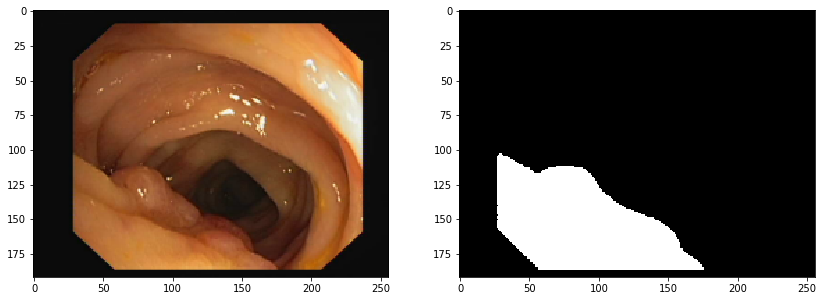

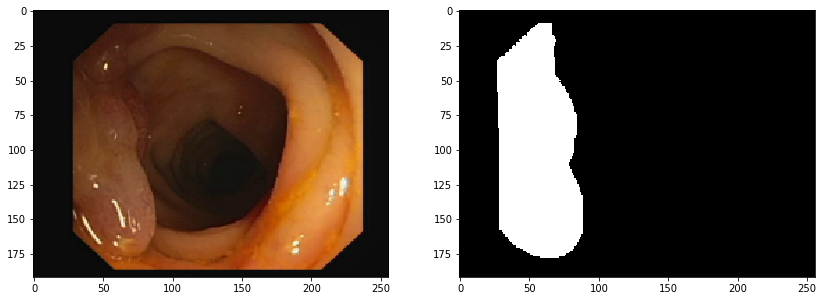

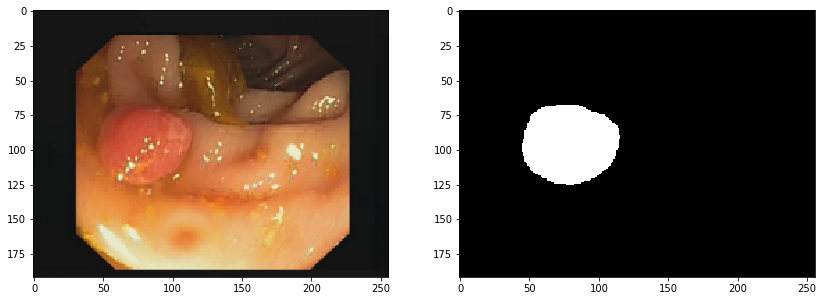

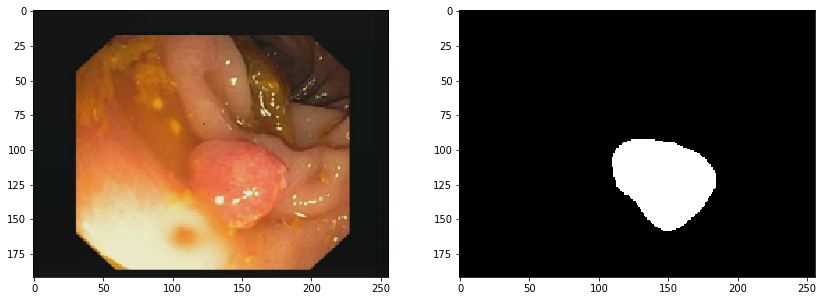

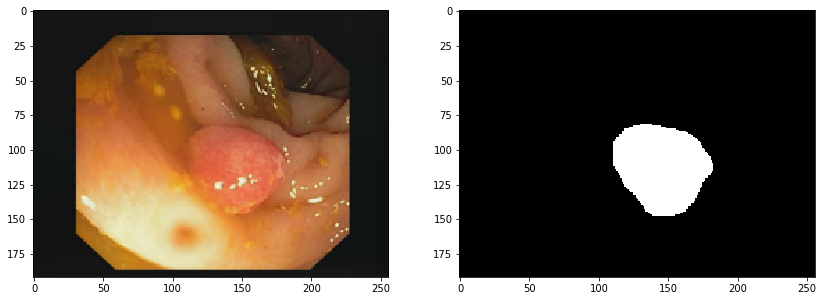

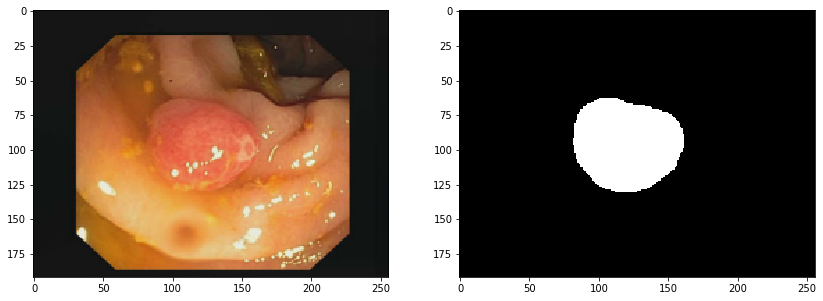

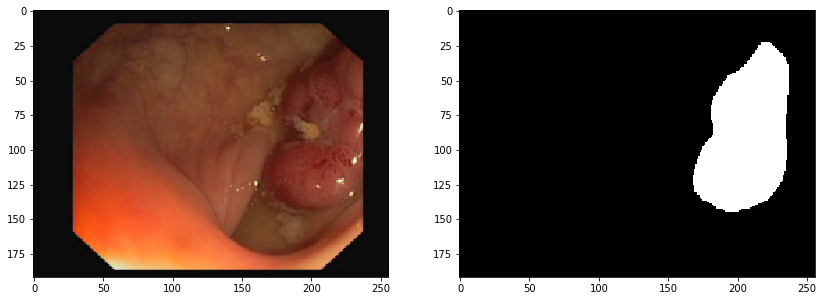

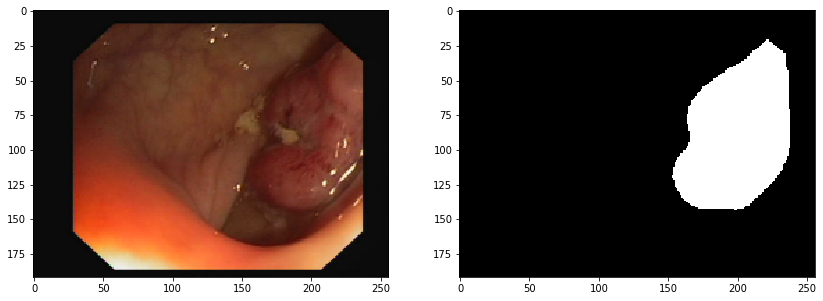

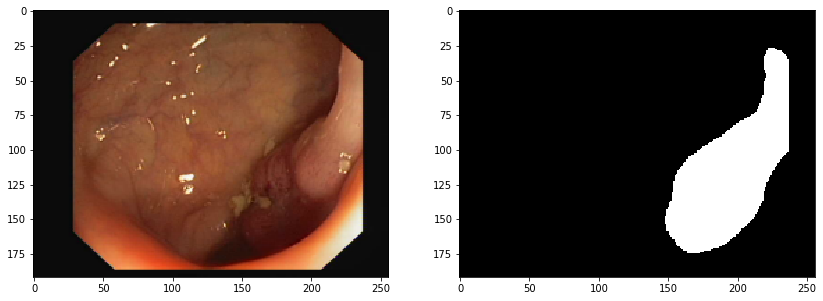

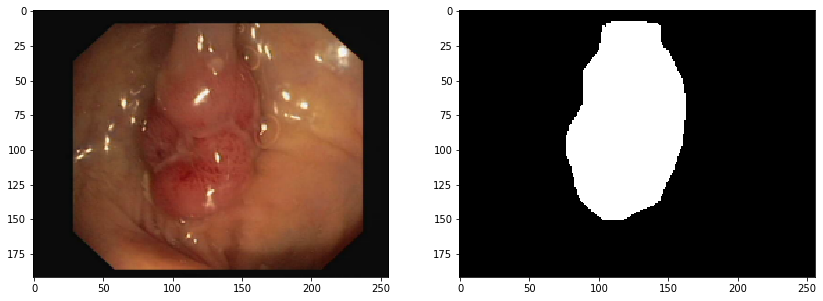

In [4]:
for img, mask in zip(images_rs[:10], masks_rs[:10]):
    
    mask = np.squeeze(mask, axis=-1) # change to H, W
    
    
    fig,_ = plt.subplots(nrows=1, ncols=2, figsize=(14,12))
    fig.axes[0].imshow(img)
    fig.axes[1].imshow(mask, cmap='gray')
    plt.show()

In [5]:
images_rs.shape, masks_rs.shape

((612, 192, 256, 3), (612, 192, 256, 1))

In [12]:
np.save("{}/CVC-ClinicDB_images.npy".format(DATASET_PATH), images_rs)
np.save("{}/CVC-ClinicDB_mask.npy".format(DATASET_PATH), masks_rs)